In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('data/titanic/train.csv')
test_df=pd.read_csv('data/titanic/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_df=train_df.drop(['PassengerId','Name','Ticket'],axis=1)

In [8]:
test_df=test_df.drop(['Name','Ticket'],axis=1)

In [9]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train_df.Embarked.fillna('S',inplace=True)

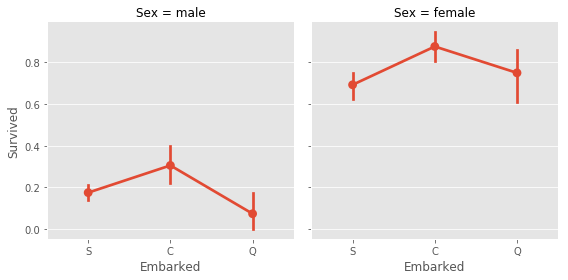

In [11]:
sns.factorplot('Embarked','Survived', data=train_df, col='Sex')

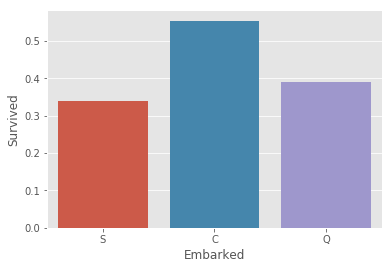

In [13]:
sns.barplot("Embarked",'Survived',data=train_df, ci=None)

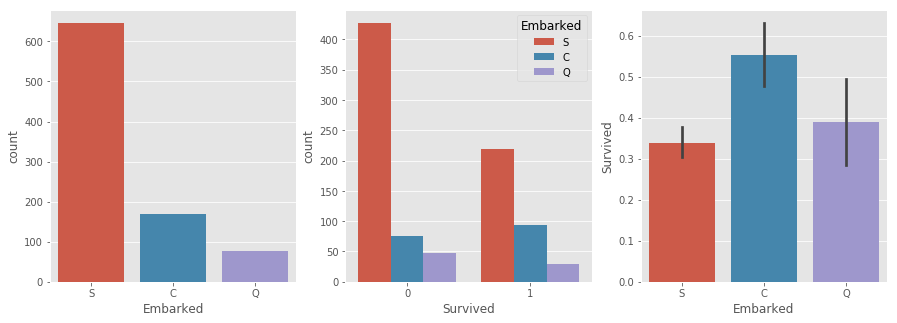

In [14]:
fig, axe=plt.subplots(1,3, figsize=(15,5))
sns.countplot(train_df.Embarked, ax=axe[0])
sns.countplot(train_df.Survived, hue=train_df.Embarked, ax=axe[1])
sns.barplot(train_df.Embarked, train_df.Survived, ax=axe[2], order=['S','C','Q'])
plt.show()

In [15]:
embark_dummy=pd.get_dummies(train_df.Embarked,prefix='Embark')
embark_dummy.columns

Index(['Embark_C', 'Embark_Q', 'Embark_S'], dtype='object')

In [16]:
embark_dummy1=pd.get_dummies(test_df.Embarked,prefix='Embark')
embark_dummy1.columns

Index(['Embark_C', 'Embark_Q', 'Embark_S'], dtype='object')

In [18]:
embark_dummy.drop(['Embark_S'],axis=1, inplace=True)
embark_dummy1.drop(['Embark_S'],axis=1, inplace=True)
train_df=pd.concat([train_df, embark_dummy],axis=1)
test_df=pd.concat([test_df, embark_dummy1],axis=1)
train_df.drop(['Embarked'],inplace=True, axis=1)
test_df.drop(['Embarked'],inplace=True, axis=1)

In [19]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embark_C', 'Embark_Q'],
      dtype='object')

In [23]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

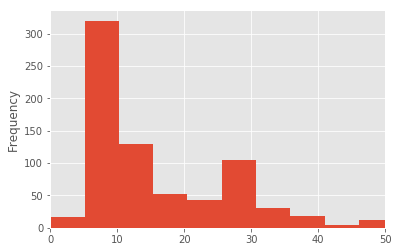

In [25]:
train_df.Fare.plot.hist(bins=100, xlim=(0,50))

In [26]:
def get_randomized(data):
    mean_v=data.mean()
    std=data.std()
    size=data.isnull().sum()
    return np.random.randint(mean_v-std, mean_v+std, size=size)


In [29]:
print(train_df.Age.shape, train_df.Age.dropna().shape)

(891,) (714,)


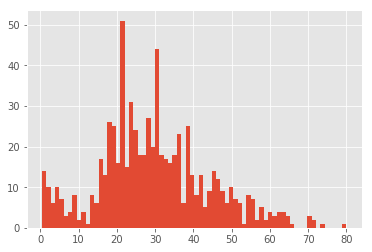

In [32]:
train_df.Age.hist(bins=70)

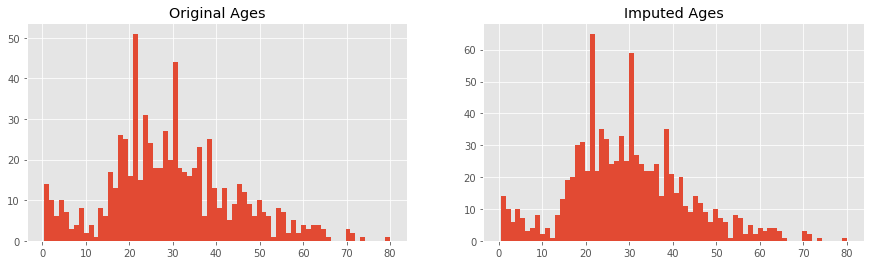

In [33]:
fix, axe=plt.subplots(1,2,figsize=(15,4))
axe[0].set_title('Original Ages')
axe[1].set_title('Imputed Ages')

train_df.Age.dropna().hist(bins=70, ax=axe[0])
train_df.Age[train_df.Age.isnull()]=get_randomized(train_df.Age)
train_df.Age.hist(bins=70,ax=axe[1])

In [34]:
train_df.Age.isnull().sum()

0

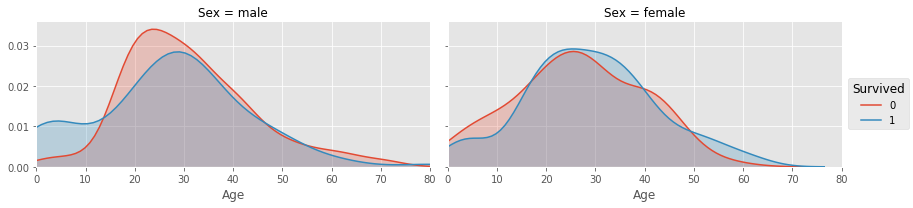

In [36]:
facet=sns.FacetGrid(train_df, hue='Survived',col='Sex', aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train_df.Age.max()))
facet.add_legend()

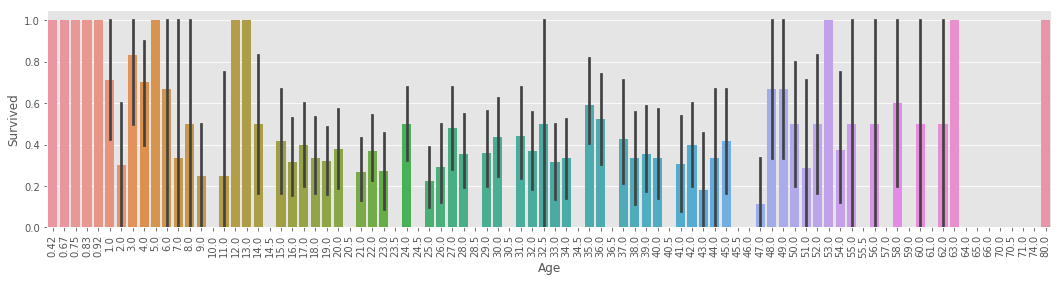

In [38]:
plt.figure(figsize=(18,4))
sns.barplot(train_df.Age, train_df.Survived)
plt.xticks(rotation=90)
plt.show()

In [39]:
avg=train_df.Survived.groupby(train_df.Age).mean().reset_index()
avg

,Age,Survived
0,0.42,1.000000
1,0.67,1.000000
2,0.75,1.000000
3,0.83,1.000000
4,0.92,1.000000
5,1.00,0.714286
6,2.00,0.300000
7,3.00,0.833333
8,4.00,0.700000
9,5.00,1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

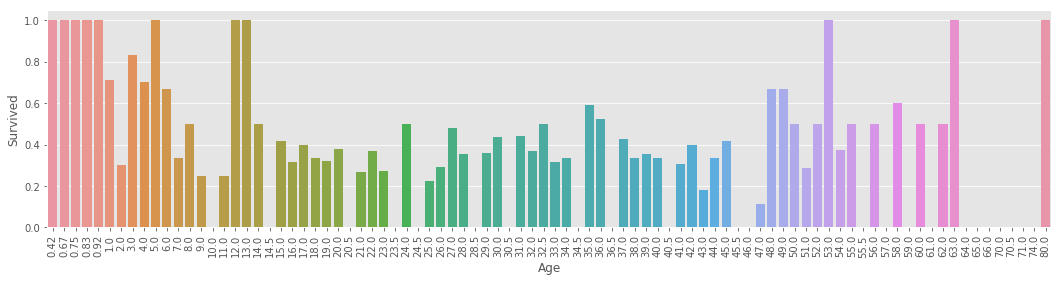

In [40]:
plt.figure(figsize=(18,4))
sns.barplot(avg.Age, avg.Survived)
plt.xticks(rotation=90)

In [43]:
# The length of avg != the length of train_df.Age.
print(len(avg),train_df.Age.shape)

88 (891,)


In [44]:
train_df.Cabin.value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
F33                3
E101               3
D                  3
F2                 3
C22 C26            3
E121               2
B5                 2
B77                2
D17                2
C65                2
F4                 2
C83                2
E33                2
C126               2
D20                2
B57 B59 B63 B66    2
E44                2
E67                2
C78                2
B35                2
C93                2
C68                2
C2                 2
E24                2
B22                2
D35                2
B20                2
                  ..
A24                1
B78                1
C46                1
A36                1
E31                1
A34                1
D21                1
B38                1
C70                1
F G63              1
E77                1
C118               1
B102               1
F38                1
A5                 1
B42                1
E34          

In [45]:
train_df.drop(['Cabin'],axis=1, inplace=True)
test_df.drop(['Cabin'],axis=1, inplace=True)

In [46]:
def handle_family(data):
    data['Family']=data.Parch+data.SibSp
    data['Family'][data.Family>0]=1
    return data.drop(['SibSp','Parch'],axis=1)

train_df=handle_family(train_df)
test_df=handle_family(test_df)


In [47]:
train_df.sample(3)

,Survived,Pclass,Sex,Age,Fare,Embark_C,Embark_Q,Family
135,0,2,male,23.0,15.0458,1,0,0
130,0,3,male,33.0,7.8958,1,0,0
512,1,1,male,36.0,26.2875,0,0,0


In [49]:
family_data=train_df.Survived.groupby(train_df.Family).mean().reset_index()
family_data.columns

Index(['Family', 'Survived'], dtype='object')

In [51]:
family_data1=train_df[['Survived','Family', "Fare"]].groupby('Family',as_index=False).mean()
family_data1.columns

Index(['Family', 'Survived', 'Fare'], dtype='object')

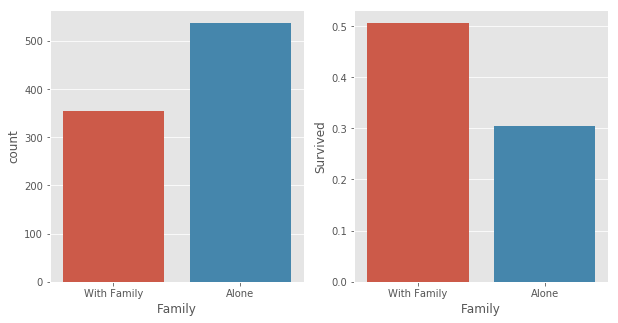

In [52]:
f, axe=plt.subplots(1,2,sharex=True, figsize=(10,5))
sns.countplot(train_df.Family, order=[1,0],ax=axe[0])
sns.barplot('Family','Survived',data=family_data, order=[1,0],ax=axe[1])
axe[0].set_xticklabels(['With Family','Alone'],rotation=0)
plt.show()


In [53]:
type(axe[0])

matplotlib.axes._subplots.AxesSubplot

In [54]:
def get_person(passenger):
    age, sex=passenger
    return 'Child' if age<16 else sex

def handle_person(data):
    data['Person']=data[['Age','Sex']].apply(get_person, axis=1)
    return data.drop('Sex',axis=1)

train_df=handle_person(train_df)
test_df=handle_person(test_df)
train_df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embark_C', 'Embark_Q', 'Family',
       'Person'],
      dtype='object')

In [58]:
train_df.sample(3)

,Survived,Pclass,Age,Fare,Embark_C,Embark_Q,Family,Person
678,0,3,43.0,46.90,0,0,1,female
297,0,1,2.0,151.55,0,0,1,Child
206,0,3,32.0,15.85,0,0,1,male


In [59]:
pd.get_dummies(train_df.Person).columns

Index(['Child', 'female', 'male'], dtype='object')

In [60]:
def dummy_person(data):
    dummy=pd.get_dummies(data['Person'])
    dummy.drop('male',axis=1, inplace=True)
    return pd.concat([data, dummy], axis=1)

In [61]:
dummy_person(train_df).head(3)

,Survived,Pclass,Age,Fare,Embark_C,Embark_Q,Family,Person,Child,female
0,0,3,22.0,7.2500,0,0,1,male,0,0
1,1,1,38.0,71.2833,1,0,1,female,0,1
2,1,3,26.0,7.9250,0,0,0,female,0,1


In [62]:
train_df=dummy_person(train_df)
test_df=dummy_person(test_df)
test_df.columns

Index(['PassengerId', 'Pclass', 'Age', 'Fare', 'Embark_C', 'Embark_Q',
       'Family', 'Person', 'Child', 'female'],
      dtype='object')

In [63]:
train_df.head(3)

,Survived,Pclass,Age,Fare,Embark_C,Embark_Q,Family,Person,Child,female
0,0,3,22.0,7.2500,0,0,1,male,0,0
1,1,1,38.0,71.2833,1,0,1,female,0,1
2,1,3,26.0,7.9250,0,0,0,female,0,1


In [64]:
train_df.Survived.groupby(train_df.Person).mean().reset_index()

,Person,Survived
0,Child,0.555556
1,female,0.758364
2,male,0.165414


In [65]:
person_data=train_df[['Person','Survived']].groupby('Person', as_index=False).mean()
person_data

,Person,Survived
0,Child,0.555556
1,female,0.758364
2,male,0.165414


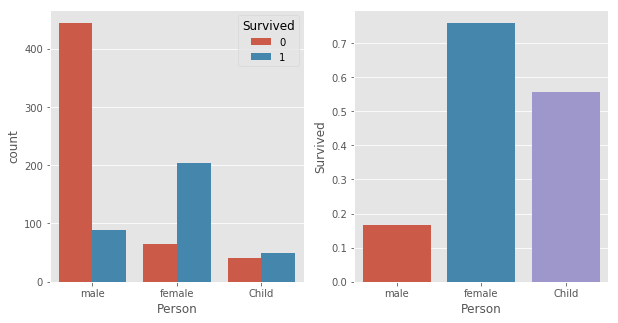

In [66]:
f, (axis1, axis2)=plt.subplots(1,2, figsize=(10,5))
#axis1.yaxis.grid(True)
sns.countplot(train_df.Person, hue=train_df.Survived,ax=axis1)
sns.barplot(person_data.Person, person_data.Survived, ax=axis2, order=['male','female','Child'])
#sns.axes_style({'axes.grid':True})


In [67]:
train_df.drop('Person',axis=1, inplace=True)
test_df.drop('Person',axis=1, inplace=True)

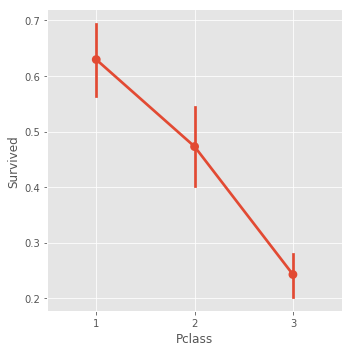

In [70]:
sns.factorplot('Pclass','Survived',data=train_df, order=[1,2,3],size=5)
plt.grid(True)
plt.show()

In [71]:
pd.get_dummies(train_df.Pclass).columns

Int64Index([1, 2, 3], dtype='int64')

In [72]:
def dummy_pclass(data):
    dummy=pd.get_dummies(data['Pclass'])
    dummy.columns=['Class 1','Class 2','Class 3']
    dummy.drop('Class 3', axis=1, inplace=True)
    data=pd.concat([data, dummy], axis=1)
    return data.drop('Pclass',axis=1)

In [73]:
dummy_pclass(train_df).head(3)

,Survived,Age,Fare,Embark_C,Embark_Q,Family,Child,female,Class 1,Class 2
0,0,22.0,7.2500,0,0,1,0,0,0,0
1,1,38.0,71.2833,1,0,1,0,1,1,0
2,1,26.0,7.9250,0,0,0,0,1,0,0


In [74]:
train_df=dummy_pclass(train_df)   
test_df=dummy_pclass(test_df)
train_df.head(3)

,Survived,Age,Fare,Embark_C,Embark_Q,Family,Child,female,Class 1,Class 2
0,0,22.0,7.2500,0,0,1,0,0,0,0
1,1,38.0,71.2833,1,0,1,0,1,1,0
2,1,26.0,7.9250,0,0,0,0,1,0,0


In [75]:
train_df.isnull().sum()

Survived    0
Age         0
Fare        0
Embark_C    0
Embark_Q    0
Family      0
Child       0
female      0
Class 1     0
Class 2     0
dtype: int64

In [76]:
y_train=train_df.Survived
x_train=train_df.drop('Survived',axis=1)

In [77]:
x_test=test_df.drop("PassengerId",axis=1).copy()

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [79]:
clf_log=LogisticRegression()
clf_log.fit(x_train, y_train)
clf_log.score(x_train, y_train)

0.81032547699214363

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,clf_log.predict(x_train))

0.81032547699214363

In [81]:
clf_svc=SVC()
clf_svc.fit(x_train, y_train)
clf_svc.score(x_train, y_train)

0.86980920314253651

In [82]:
clf_random=RandomForestClassifier(n_estimators=100)
clf_random.fit(x_train, y_train)
clf_random.score(x_train, y_train)

0.98765432098765427

In [83]:
clf_knn=KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(x_train, y_train)
clf_knn.score(x_train, y_train)

0.83613916947250277

In [84]:
clf_nb=GaussianNB()
clf_nb.fit(x_train, y_train)
clf_nb.score(x_train, y_train)

0.75645342312008979

In [92]:
x_test.Age.fillna(x_train.Age.mean(), inplace=True)
x_test.isnull().sum()

Age         0
Fare        1
Embark_C    0
Embark_Q    0
Family      0
Child       0
female      0
Class 1     0
Class 2     0
dtype: int64

In [96]:
x_test.Fare.fillna(x_train.Fare.mean(), inplace=True)
x_test.isnull().sum()

Age         0
Fare        0
Embark_C    0
Embark_Q    0
Family      0
Child       0
female      0
Class 1     0
Class 2     0
dtype: int64

In [97]:
y_pred=clf_random.predict(x_test)

In [98]:
importance=pd.DataFrame({"features":x_train.columns, 'importance':clf_random.feature_importances_})

In [99]:
importance.sort_values(by='importance', ascending=False).reset_index(drop=True)

,features,importance
0,Fare,0.296165
1,Age,0.285019
2,female,0.243972
3,Class 1,0.046132
4,Class 2,0.044102
5,Child,0.023891
6,Family,0.023665
7,Embark_C,0.022701
8,Embark_Q,0.014352


In [100]:
clf_log.intercept_

array([-1.62195869])

In [101]:
clf_log.coef_

array([[ -2.77356011e-02,   8.96306175e-04,   5.83445740e-01,
          3.35035460e-01,  -2.15816992e-01,   1.62749460e+00,
          2.75854075e+00,   2.03117298e+00,   1.13026962e+00]])

In [102]:
clf_log.coef_[0]

array([ -2.77356011e-02,   8.96306175e-04,   5.83445740e-01,
         3.35035460e-01,  -2.15816992e-01,   1.62749460e+00,
         2.75854075e+00,   2.03117298e+00,   1.13026962e+00])

In [103]:
pd.DataFrame({'Features':x_train.columns, 'coeff':clf_log.coef_[0]})

,Features,coeff
0,Age,-0.027736
1,Fare,0.000896
2,Embark_C,0.583446
3,Embark_Q,0.335035
4,Family,-0.215817
5,Child,1.627495
6,female,2.758541
7,Class 1,2.031173
8,Class 2,1.130270
